# Importing the essential Libraries

In [1]:
from IPython.display import Image
Image(url='https://nextommerce.com/wp-content/uploads/2019/04/pasted-image-0.png')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Reading Dataset (.csv)

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

# Finding shape of Dataset

In [4]:
df.shape

(10000, 14)

# Printing 10 rows from top

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Printing Column name that are present in the Dataset

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# printing Data type object of each column

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# checking for missing value

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Getting unique count for each variable

In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

# Printing Unique Values of the categorical variables

In [10]:
print("Geography=",df['Geography'].unique())
print("Gender=",df['Gender'].unique())
print("NumOfProducts=",df['NumOfProducts'].unique())
print("HasCrCard=",df['HasCrCard'].unique())
print("IsActiveMember=",df['IsActiveMember'].unique())


Geography= ['France' 'Spain' 'Germany']
Gender= ['Female' 'Male']
NumOfProducts= [1 3 2 4]
HasCrCard= [1 0]
IsActiveMember= [1 0]




# converting Gender into 0 & 1 form
# female=0, male=1

In [11]:
#dict_gender = {'Male': 1, 'Female':0}
#df.replace({'Gender': dict_gender}, inplace = True)

#df['Gender'] = df['Gender'].fillna(-1)

# We don't require  RowNumber , CustomerId and Surname, because these are customer specific and didn't play any importand role in Training the model
# so drop these features

In [12]:
final_dataset = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [13]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
final_dataset = pd.get_dummies(final_dataset, drop_first=False)

In [14]:
final_dataset.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Estimating the total Percentage of Churned Customers

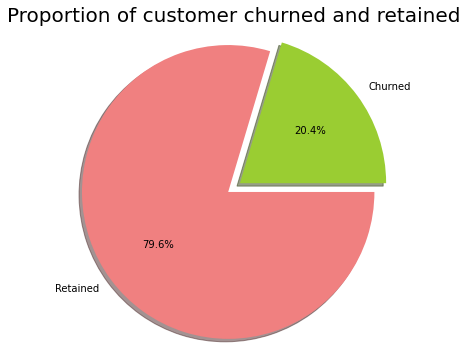

In [16]:
labels = 'Churned', 'Retained'
colors=['yellowgreen','lightcoral']
sizes = [final_dataset.Exited[final_dataset['Exited']==1].count(), final_dataset.Exited[df['Exited']==0].count()]
explode=(0,0.1)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=360)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [17]:
#fig, axarr = plt.subplots(2, 2, figsize=(25, 15))
#sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
#sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
#sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
#sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])*/

# Data visualization of customers churned with respect to diffrent Categorical features

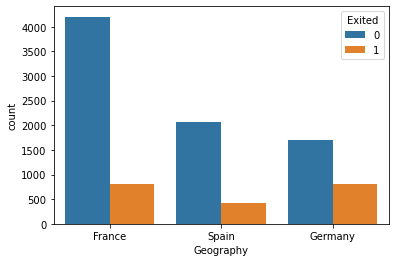

In [18]:
sns.countplot(x='Geography', hue = 'Exited',data = df)

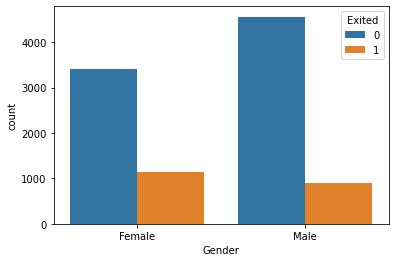

In [19]:
sns.countplot(x='Gender', hue = 'Exited',data = df)

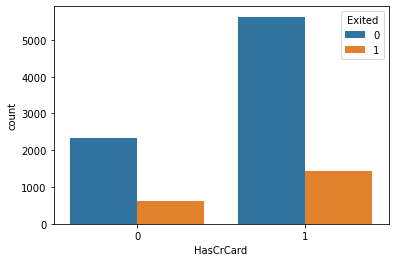

In [20]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df)

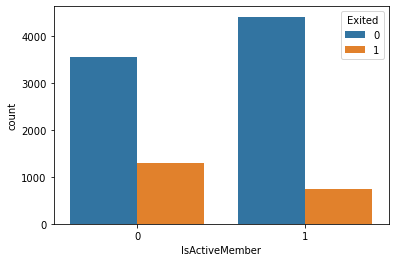

In [21]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

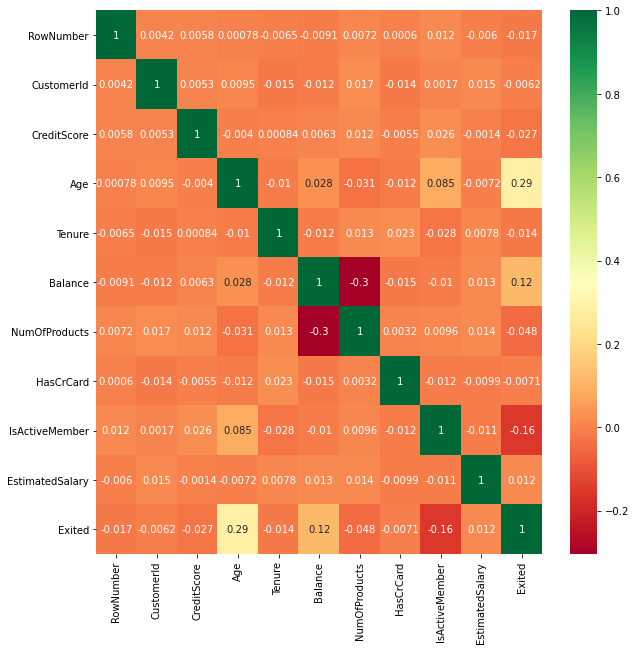

In [22]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [23]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [24]:
# Splitting the Dataset into Dependent and Independent Variables
X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
Y = final_dataset.iloc[:, 8].values

In [25]:
X.head()
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [26]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 42)

In [27]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
print(X_train)

[[ 0.35649971 -0.6557859   0.34567966 ...  1.00150113 -0.57946723
  -0.57638802]
 [-0.20389777  0.29493847 -0.3483691  ... -0.99850112  1.72572313
  -0.57638802]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.99850112 -0.57946723
   1.73494238]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.15932282  0.3900109   1.03972843 ...  1.00150113 -0.57946723
  -0.57638802]
 [ 0.47065475  1.15059039 -1.38944225 ... -0.99850112  1.72572313
  -0.57638802]]


In [29]:
## Feature Importance
#from sklearn.ensemble import ExtraTreesRegressor
#model = ExtraTreesRegressor()
#model.fit(X,Y)

In [30]:
#print(model.feature_importances_)

In [31]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 90) 
classifier.fit(X_train, Y_train) 

LogisticRegression(random_state=90)

In [32]:
classifier.predict_proba(X_test)

array([[0.71569744, 0.28430256],
       [0.90013654, 0.09986346],
       [0.73779046, 0.26220954],
       ...,
       [0.72114954, 0.27885046],
       [0.89606844, 0.10393156],
       [0.79291185, 0.20708815]])

In [33]:
y_pred = classifier.predict(X_test) 


In [34]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, y_pred) 

print ("Confusion Matrix : \n", cm) 


Confusion Matrix : 
 [[1560   47]
 [ 316   77]]


In [35]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(Y_test, y_pred)*100,"%") 

Accuracy :  81.85 %


# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [37]:
y_pred = rf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
print(cm)
print(accuracy_score(Y_test,y_pred)*100,"%")

[[1545   62]
 [ 200  193]]
86.9 %


In [39]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))

model=pickle.load(open('model.pkl','rb'))
